# Data Analysis over the Clusters
## Loading libraries

In [1]:
import numpy as np
import cygnus_lib as cy
import toolslib as tl
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from ast import literal_eval
from math import degrees

## font definition
%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']

## Variables definition

In [2]:
x_resolution = y_resolution = 2048
rescale      = 512
scale        = int(x_resolution/rescale)
pixelscale   = 55e-3             #55e-3 for Orange ------ 0.125 for lemonn mm/pixel

## Loading data - LONG

List contain:

[0 - Run number, 1 - Image Number, 2 - Tag of the cluster, 3 - Pixel X position, 4 - Pixel Y position, 5 - Light in the pixel, 6 - Pedestal in the pixel]

In [117]:
max_image_to_read = 30

vector_eps = [2.26, 3.5, 2.8, 6]
vector_min_samples = [2, 35, 6, 2]

iterative = 1
dt = {}
cl = {}
aux1 = 0

for cut1 in range(0,925,25):
    aux1 += 1
    #------------------- Loading File ------------------------------#
    directory = ("./data/")          # Directory of the output file
    filename  = ("ClustersTable_I%d_Cut%d_E%f_M%d" % (iterative,cut1,vector_eps[iterative],vector_min_samples[iterative]))    # Name of the output file
    extension = (".csv")             # Extension of the output file
    dataout = directory + filename + extension # Full path of the output file

    dt = {'Run': np.int64, 'Image': np.int64, 'Tag': np.object, 'X': np.object, 'Y': np.object, 'Light': np.object, 'Pedestal': np.object}
    colhead = ["Run","Image","Tag","X","Y","Light","Pedestal"]
    df = pd.read_csv(dataout,dtype=dt)

    df.loc[:,'X'] = df.loc[:,'X'].apply(literal_eval)
    df.loc[:,'Y'] = df.loc[:,'Y'].apply(literal_eval)
    df.loc[:,'Light'] = df.loc[:,'Light'].apply(literal_eval)
    df.loc[:,'Pedestal'] = df.loc[:,'Pedestal'].apply(literal_eval)

    # Showing the table
    dt["cut" + str(cut1)] = df.copy()
    del df
    
    ind,count = np.unique(dt["cut" + str(cut1)].Image,return_counts = True)
    cl["cut" + str(cut1)]      = np.zeros(max_image_to_read,dtype=int)
    cl["cut" + str(cut1)][ind] = count

## Label by eye

In [118]:
## The 'truth' made by eye for the long tracks on the first 30th images of the run 494

lbe   = np.zeros(30,dtype=int)
lone  = [1, 8, 10, 13, 16, 20, 27, 28] 
ltwo  = [17, 24, 26]
lbe[lone] = 1
lbe[ltwo] = 2

#t["cut" + str(cut1)].head(n=100)

## The 'truth' made by eye for the long tracks on the first 62th images of the run 494

# lbe   = np.zeros(62,dtype=int)
# lone  = [1, 8, 10, 13, 16, 20, 27, 28, 31, 33, 40, 42, 43, 49, 56] 
# ltwo  = [17, 24, 26, 46, 61]
# ltre  = [53]
# lbe[lone] = 1
# lbe[ltwo] = 2
# lbe[ltre] = 3

## Function to get the efficience

In [119]:
#                          Condition: A             Not A
#
#  Test says “A”       True positive (TP)   |   False positive (FP)
#                    ------------------------------------------
#  Test says “Not A”   False negative (FN)  |    True negative (TN)

## Sensitivity = TP/(TP + FN)
## Specificity = TN/(FP + TN)

# True positive rate (or sensitivity): TPR = TP/(TP+FN)
# False positive rate :                FPR = FP/(FP+TN)

In [125]:
FP = np.zeros(aux1,dtype=int)
FN = np.zeros(aux1,dtype=int)

TP = np.zeros(aux1,dtype=int)
TN = np.zeros(aux1,dtype=int)

aux = -1
truth = lbe
for cut1 in range(0,925,25):
    aux += 1
    cls = cl["cut" + str(cut1)]
    
    #cls[41] = 0 # Image 41 is not good 
    
    dif = cls - truth
    FP[aux] = np.sum(dif[dif>0])
    FN[aux] = np.abs(np.sum(dif[dif<0]))
    TP[aux] = np.sum(truth[dif==0]) + np.sum(truth[dif>0]) + (np.sum(truth[dif<0])-np.abs(np.sum(dif[dif<0])))
    TN[aux] = np.sum(truth[dif==0]==0)

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


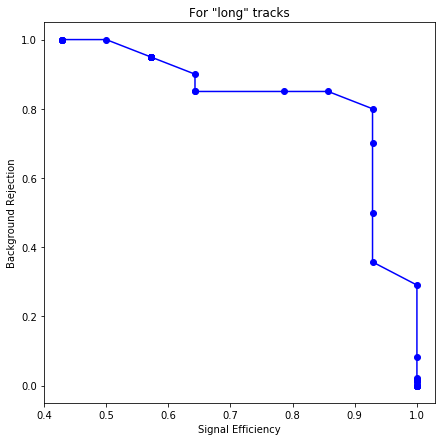

In [126]:
fig = plt.figure(figsize=(7,7))

plt.plot(TPR,1-FPR,'-ob')
plt.ylabel('Background Rejection')
plt.xlabel('Signal Efficiency')
#plt.legend(["Ends in the circle", "Ends out of the circle" ])
#plt.ylim([0.5,2.5])
#plt.xlim([5,30])
plt.title('For "long" tracks')
plt.show()

In [132]:
np.sqrt(0.09/14)*100

8.017837257372731

In [134]:
1-FPR[]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00884956, 0.01234568, 0.01612903, 0.02173913,
       0.08333333, 0.29032258, 0.35714286, 0.5       , 0.7       ,
       0.8       , 0.85      , 0.85      , 0.85      , 0.85      ,
       0.9       , 0.95      , 0.95      , 0.95      , 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.95      ,
       0.95      , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [135]:
TPR

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.92857143, 0.92857143, 0.92857143,
       0.92857143, 0.85714286, 0.78571429, 0.64285714, 0.64285714,
       0.64285714, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.5       , 0.42857143, 0.42857143, 0.42857143,
       0.42857143, 0.42857143])

In [136]:
range(0,925,25)

range(0, 925, 25)

In [141]:
range(0,925,25)[31]

775